In [1]:
import numpy#for numerical analysis
import tensorflow

In [2]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras

In [4]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [8]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[3]

1

In [10]:
import matplotlib.pyplot as plt

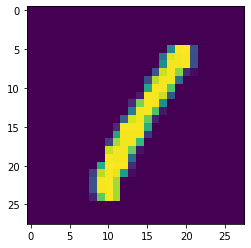

In [11]:
plt.imshow(x_train[3])

In [12]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [13]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [14]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.2440 - accuracy: 0.9516 - val_loss: 0.0919 - val_accuracy: 0.9733
Epoch 2/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.0796 - val_accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0876 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.1007 - val_accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.1153 - val_accuracy: 0.9749


In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.11528640240430832, 0.9749000072479248]


In [19]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[1.6126143e-13 1.7506254e-18 1.9069608e-13 1.2554427e-10 3.3054871e-14
  1.1326773e-15 3.5699560e-21 1.0000000e+00 8.3075528e-14 3.2484283e-11]
 [1.0047563e-08 2.2315666e-07 9.9999976e-01 7.7053050e-13 1.4579871e-13
  4.0765511e-13 5.7580802e-08 3.3806231e-21 1.8749269e-09 5.8437528e-22]
 [4.0020840e-08 9.9998224e-01 6.0570969e-08 1.0846211e-09 1.1166075e-05
  5.9509359e-10 4.8621423e-08 4.1746856e-10 6.4396404e-06 2.2727467e-11]
 [1.0000000e+00 7.0215570e-17 4.0860822e-12 2.8229128e-15 8.9935145e-13
  4.7081269e-14 1.6915356e-11 7.0987283e-14 2.9497857e-10 2.9914142e-09]
 [8.3610007e-13 2.6755248e-16 2.0657126e-15 2.5685148e-17 1.0000000e+00
  1.0676955e-14 5.1925449e-16 4.0056249e-14 1.4817669e-13 6.0017435e-10]]


In [20]:
import numpy as np

In [21]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [22]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [26]:
model.save('models/mnistcnn.h5')

In [ ]:
print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=X_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))